## Telecom chrun case study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, **telecom companies need to predict which customers are at high risk of churn.**




#### Import necessery libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Set the session options
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
pd.read_csv('data_dictionary.csv')

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


### Data understanding:

In [3]:
telecom_data = pd.read_csv('train.csv')
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(telecom_data.describe())

                 id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   


In [6]:
telecom_data.shape

(69999, 172)

In [7]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

In [8]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

arpu_3g_6                   0.749025
count_rech_2g_6             0.749025
night_pck_user_6            0.749025
arpu_2g_6                   0.749025
date_of_last_rech_data_6    0.749025
                              ...   
last_day_rch_amt_8          0.000000
vol_2g_mb_6                 0.000000
vol_2g_mb_7                 0.000000
vol_2g_mb_8                 0.000000
churn_probability           0.000000
Length: 172, dtype: float64

In [9]:
telecom_data['good_phase_recharge'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']

### Data preparation, Cleaning & Feature engineering:

In [10]:
seventy_percentile = int(telecom_data['good_phase_recharge'].quantile(.70))
telecom_data = telecom_data[(telecom_data.good_phase_recharge > seventy_percentile)]
telecom_data.shape

(20951, 173)

In [11]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_3g_6        0.623693
av_rech_amt_data_6     0.623693
max_rech_data_6        0.623693
count_rech_2g_6        0.623693
arpu_3g_6              0.623693
                         ...   
vol_2g_mb_6            0.000000
vol_2g_mb_7            0.000000
vol_2g_mb_8            0.000000
vol_3g_mb_6            0.000000
good_phase_recharge    0.000000
Length: 173, dtype: float64

In [12]:
filtered_columns = list(null_values_per[null_values_per < 0.6].index) 

In [13]:
filtered_data = telecom_data[filtered_columns]
filtered_data.head()

,loc_ic_mou_8,loc_ic_t2f_mou_8,spl_og_mou_8,std_ic_mou_8,std_ic_t2t_mou_8,isd_og_mou_8,std_ic_t2m_mou_8,std_og_mou_8,std_ic_t2f_mou_8,og_others_8,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,good_phase_recharge
12,24.53,0.00,0.00,2.46,0.00,0.0,2.46,632.18,0.0,0.0,...,110,50,110,0,0,0.00,0.0,0.00,0.0,939
15,629.94,8.88,0.00,0.00,0.00,0.0,0.00,6.26,0.0,0.0,...,250,250,0,150,250,260.42,0.0,354.35,0.0,1054
23,202.89,23.66,0.01,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,110,144,110,50,30,0.00,0.0,0.00,0.0,2410
24,171.01,1.13,0.36,21.93,0.00,0.0,21.93,121.79,0.0,0.0,...,110,30,110,0,30,0.04,0.0,0.00,0.0,867
25,425.58,11.24,25.24,10.04,0.15,0.0,9.89,416.99,0.0,0.0,...,150,130,110,150,50,0.00,0.0,0.00,0.0,810


In [14]:
get_null_percentage(filtered_data)

loc_ic_mou_8            0.03112
loc_og_t2t_mou_8        0.03112
loc_ic_t2f_mou_8        0.03112
loc_og_t2m_mou_8        0.03112
spl_ic_mou_8            0.03112
                         ...   
vol_3g_mb_8             0.00000
vol_3g_mb_7             0.00000
last_date_of_month_6    0.00000
arpu_6                  0.00000
good_phase_recharge     0.00000
Length: 143, dtype: float64

In [15]:
# filtered_data.apply(pd.value_counts)

filtered_data.describe()

,loc_ic_mou_8,loc_ic_t2f_mou_8,spl_og_mou_8,std_ic_mou_8,std_ic_t2t_mou_8,isd_og_mou_8,std_ic_t2m_mou_8,std_og_mou_8,std_ic_t2f_mou_8,og_others_8,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,good_phase_recharge
count,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,...,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000
mean,239.746322,15.255007,7.134589,48.991480,15.380842,2.292762,30.897859,369.006732,2.708919,0.059789,...,174.157606,162.239034,104.972985,104.592287,95.135841,78.291806,77.841886,69.113775,260.005379,1393.698487
std,302.558635,44.714634,22.807386,134.394158,70.408025,52.920136,97.453306,622.137349,19.876177,3.137657,...,173.788102,167.636398,144.190690,140.074139,139.881888,279.031654,277.668452,271.477639,886.512517,1006.408144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,741.000000
25%,57.490000,0.000000,0.000000,2.060000,0.000000,0.000000,0.250000,3.210000,0.000000,0.000000,...,110.000000,67.000000,30.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,901.000000
50%,150.290000,2.110000,0.680000,13.630000,0.780000,0.000000,6.360000,88.780000,0.000000,0.000000,...,128.000000,130.000000,110.000000,91.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1139.000000
75%,309.275000,12.310000,6.660000,45.100000,9.380000,0.000000,26.670000,510.870000,0.245000,0.000000,...,200.000000,198.000000,120.000000,130.000000,130.000000,13.910000,14.310000,9.200000,0.000000,1592.000000
max,5748.810000,1588.530000,954.510000,3777.940000,3423.390000,5681.540000,2879.310000,13980.060000,1394.890000,394.930000,...,3299.000000,4449.000000,4010.000000,3100.000000,4449.000000,10285.900000,7873.550000,11117.610000,45735.400000,75525.000000


In [16]:
# ===> Drop these columns as there is no change in the data overall
dropping_columns = [
    'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_8',
    'std_og_t2c_mou_8', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'loc_og_t2o_mou', 'std_og_t2o_mou',
    'loc_ic_t2o_mou', 'circle_id']
filtered_data = filtered_data.drop(columns=dropping_columns, axis=1)

In [17]:
filtered_data.describe()

,loc_ic_mou_8,loc_ic_t2f_mou_8,spl_og_mou_8,std_ic_mou_8,std_ic_t2t_mou_8,isd_og_mou_8,std_ic_t2m_mou_8,std_og_mou_8,std_ic_t2f_mou_8,og_others_8,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,good_phase_recharge
count,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,20299.000000,...,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000,20951.000000
mean,239.746322,15.255007,7.134589,48.991480,15.380842,2.292762,30.897859,369.006732,2.708919,0.059789,...,174.157606,162.239034,104.972985,104.592287,95.135841,78.291806,77.841886,69.113775,260.005379,1393.698487
std,302.558635,44.714634,22.807386,134.394158,70.408025,52.920136,97.453306,622.137349,19.876177,3.137657,...,173.788102,167.636398,144.190690,140.074139,139.881888,279.031654,277.668452,271.477639,886.512517,1006.408144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,741.000000
25%,57.490000,0.000000,0.000000,2.060000,0.000000,0.000000,0.250000,3.210000,0.000000,0.000000,...,110.000000,67.000000,30.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,901.000000
50%,150.290000,2.110000,0.680000,13.630000,0.780000,0.000000,6.360000,88.780000,0.000000,0.000000,...,128.000000,130.000000,110.000000,91.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1139.000000
75%,309.275000,12.310000,6.660000,45.100000,9.380000,0.000000,26.670000,510.870000,0.245000,0.000000,...,200.000000,198.000000,120.000000,130.000000,130.000000,13.910000,14.310000,9.200000,0.000000,1592.000000
max,5748.810000,1588.530000,954.510000,3777.940000,3423.390000,5681.540000,2879.310000,13980.060000,1394.890000,394.930000,...,3299.000000,4449.000000,4010.000000,3100.000000,4449.000000,10285.900000,7873.550000,11117.610000,45735.400000,75525.000000


In [18]:
filtered_data.roam_og_mou_8.fillna(0, inplace=True)

In [19]:
def is_churned(_x):
    if ((_x.total_ic_mou_8 == 0) & (_x.total_og_mou_8 == 0) & (_x.vol_2g_mb_8 == 0) & (_x.vol_3g_mb_8 == 0)):
        return 1
    else:
        return 0
filtered_data['churn'] = filtered_data.apply(is_churned, axis=1)

In [20]:
filtered_data.churn.value_counts()

0    19743
1     1208
Name: churn, dtype: int64

In [21]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Data columns (total 134 columns):
 #    Column                Dtype  
---   ------                -----  
 0    loc_ic_mou_8          float64
 1    loc_ic_t2f_mou_8      float64
 2    spl_og_mou_8          float64
 3    std_ic_mou_8          float64
 4    std_ic_t2t_mou_8      float64
 5    isd_og_mou_8          float64
 6    std_ic_t2m_mou_8      float64
 7    std_og_mou_8          float64
 8    std_ic_t2f_mou_8      float64
 9    og_others_8           float64
 10   std_og_t2f_mou_8      float64
 11   loc_og_t2c_mou_8      float64
 12   loc_ic_t2t_mou_8      float64
 13   loc_og_t2t_mou_8      float64
 14   loc_og_t2f_mou_8      float64
 15   loc_ic_t2m_mou_8      float64
 16   std_og_t2m_mou_8      float64
 17   ic_others_8           float64
 18   roam_og_mou_8         float64
 19   loc_og_mou_8          float64
 20   roam_ic_mou_8         float64
 21   isd_ic_mou_8          float64
 22   std_og_t2t_mou_8   

In [22]:
# ===> Drop columns 'last_date_of_month_6', 'last_date_of_month_7' and last_date_of_month_8 as it's same across all columns
filtered_data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [23]:
_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for i in _columns:
    filtered_data[i] = pd.to_datetime(filtered_data[i], infer_datetime_format=True)



In [24]:
without8_columns = filtered_data.columns.drop(list(filtered_data.filter(regex='_8')))
filtered_data = filtered_data[without8_columns] 
filtered_columns = filtered_data.columns

In [25]:
filtered_data[(filtered_data.arpu_6 <= 0) & (filtered_data.arpu_7 <= 0)].churn.value_counts() 

0    2
Name: churn, dtype: int64

In [26]:
filtered_data.tail()

,loc_ic_mou_6,spl_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2f_mou_6,ic_others_6,isd_ic_mou_6,std_ic_mou_6,std_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_og_t2t_mou_6,...,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,good_phase_recharge,churn
69981,435.86,0.00,1.33,2.38,0.00,0.00,4.76,1.04,18.78,479.63,...,554,169,325,169,325,0.00,0.0,0.00,1221,0
69983,12.89,0.00,3.71,0.00,0.45,0.00,9.24,5.53,0.00,140.89,...,478,110,130,110,130,0.00,0.0,0.00,820,0
69984,324.38,0.00,0.00,7.26,0.00,10.88,7.89,0.63,5.38,84.91,...,900,599,550,152,550,0.72,0.0,845.49,2796,0
69990,17.09,0.25,0.00,0.00,0.20,0.00,9.21,9.21,0.00,3.01,...,480,110,110,0,20,0.00,0.0,0.00,826,0
69996,529.48,0.00,0.00,2.50,5.14,5.05,2.50,0.00,339.11,77.13,...,250,279,250,279,250,0.00,0.0,0.00,876,0


### EDA

##### Correlation: 

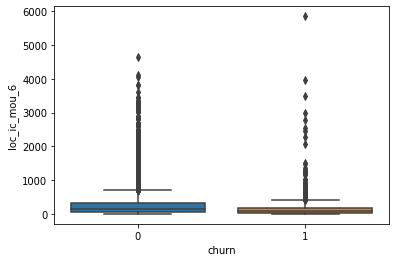

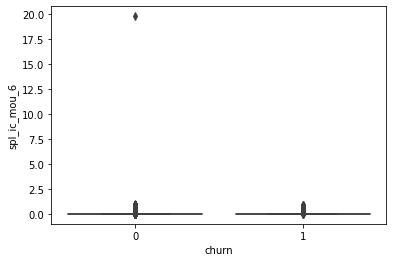

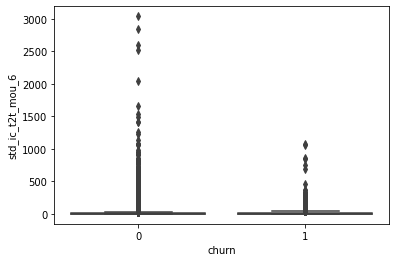

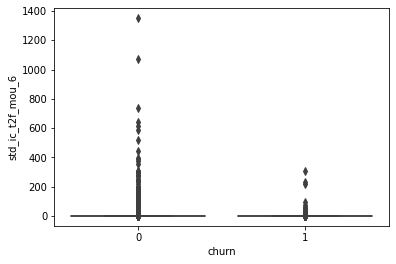

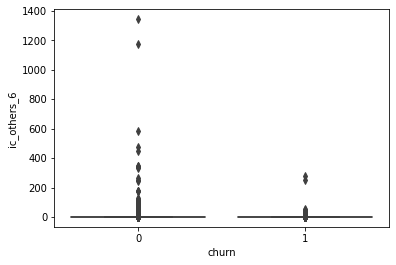

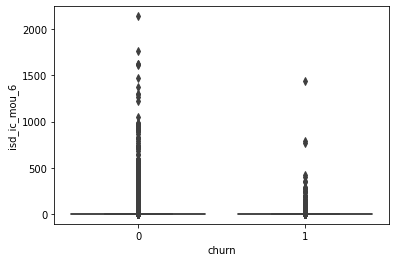

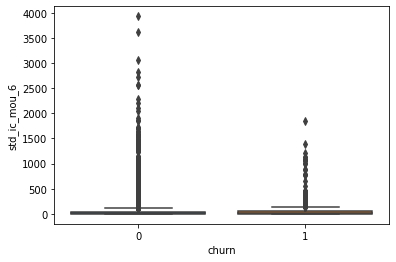

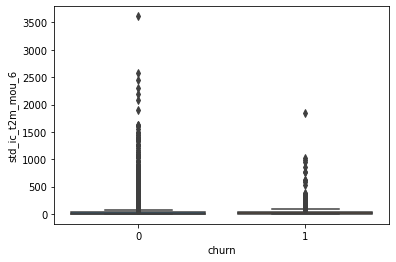

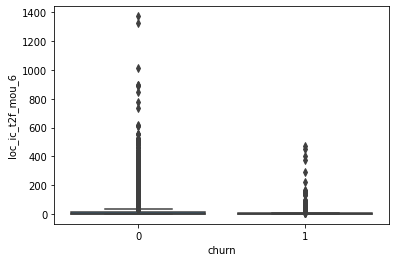

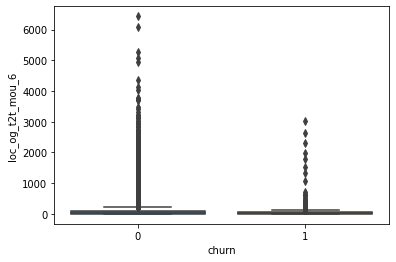

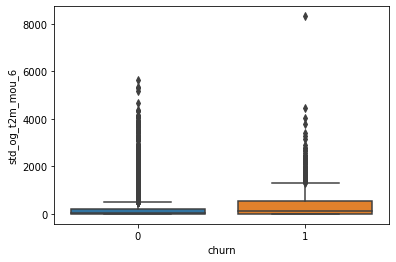

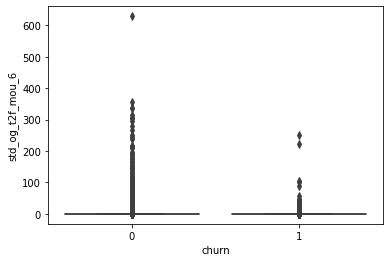

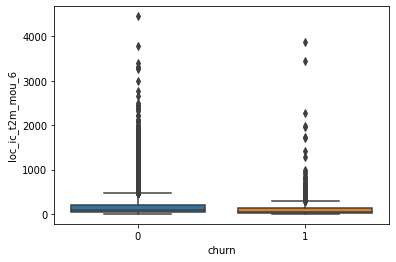

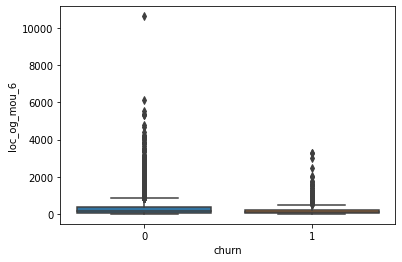

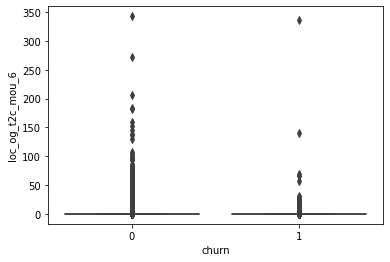

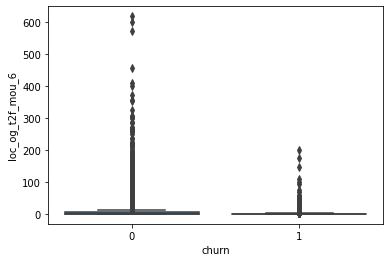

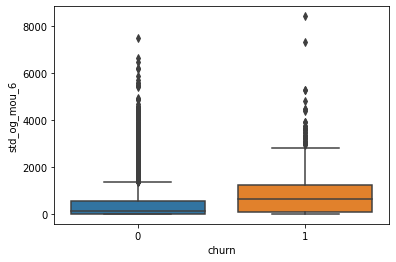

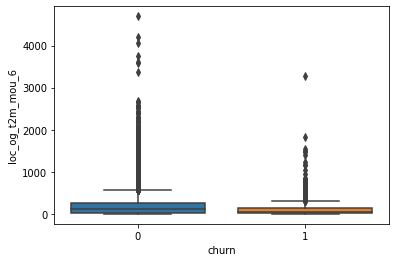

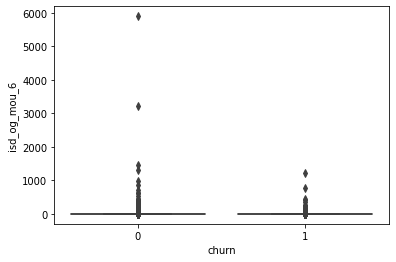

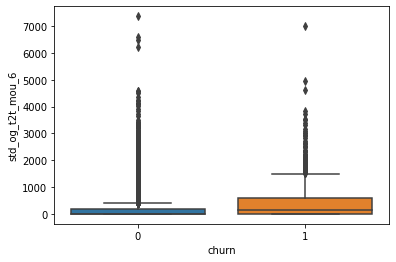

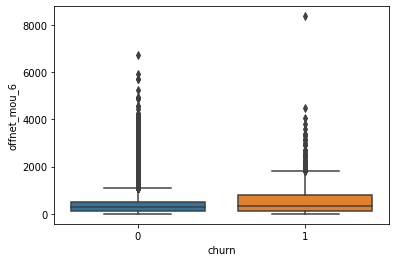

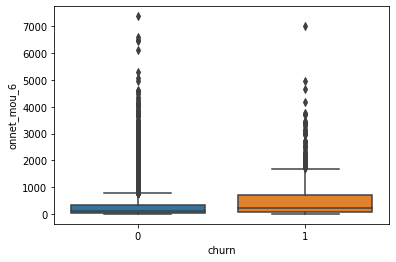

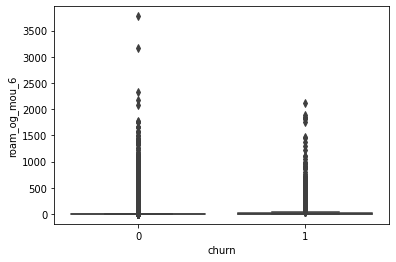

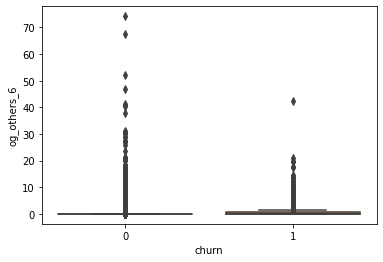

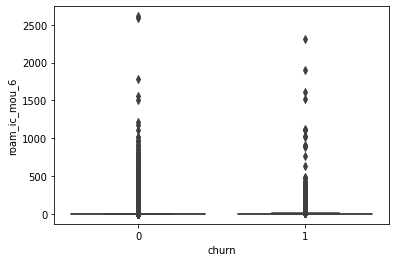

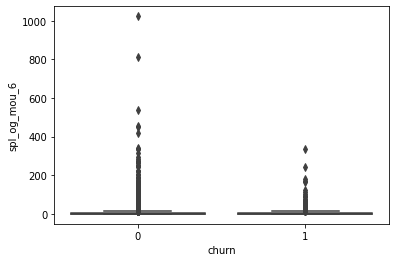

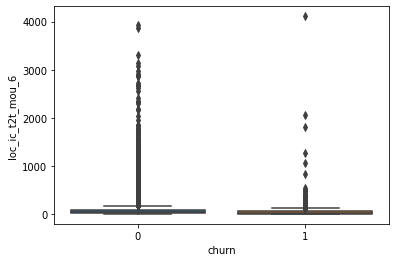

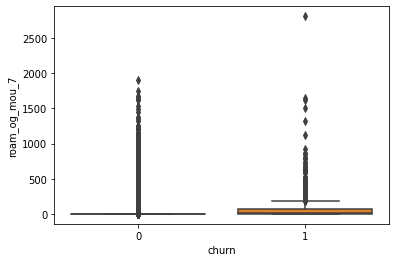

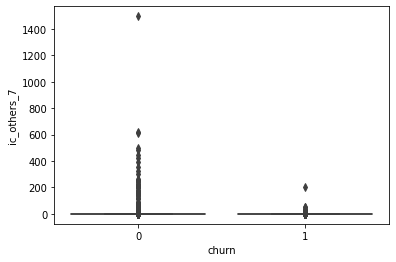

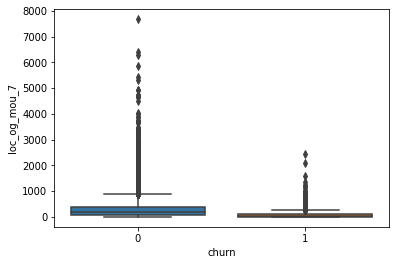

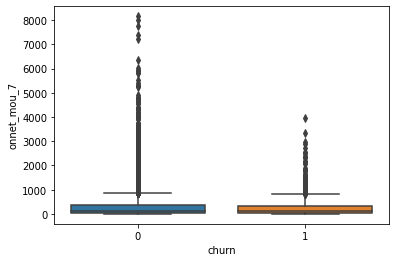

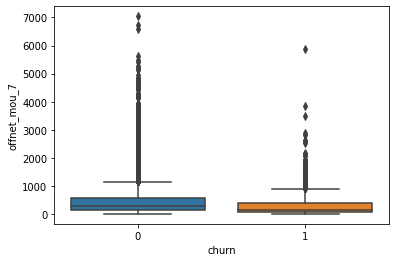

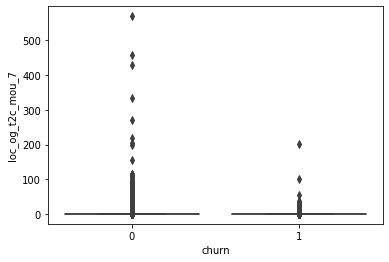

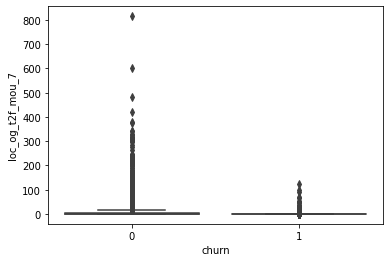

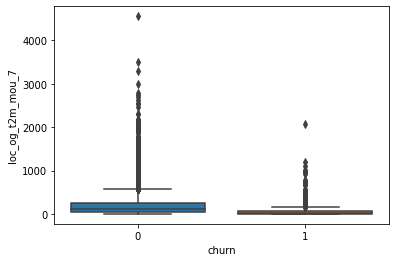

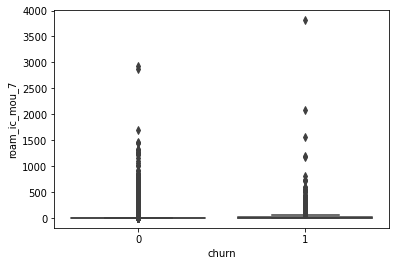

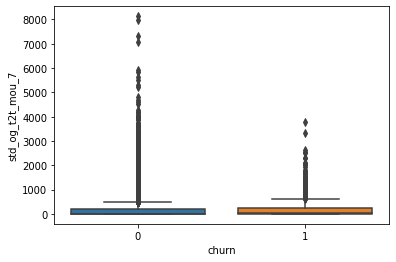

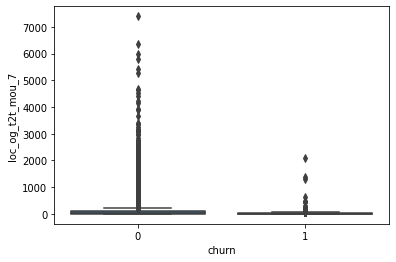

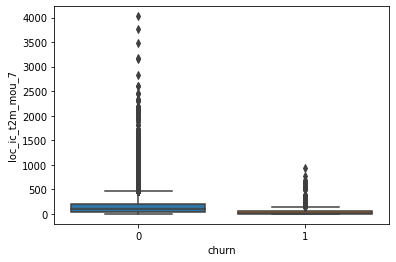

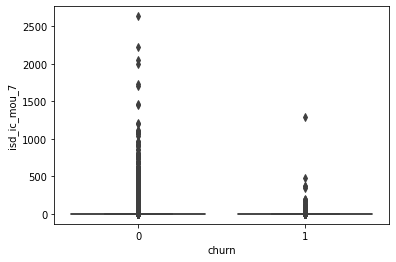

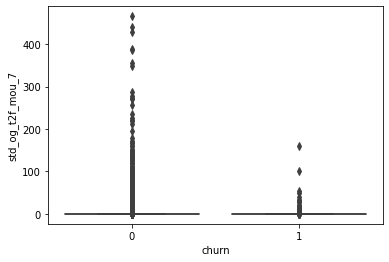

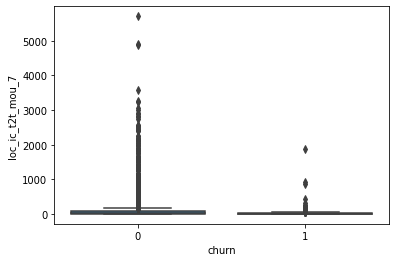

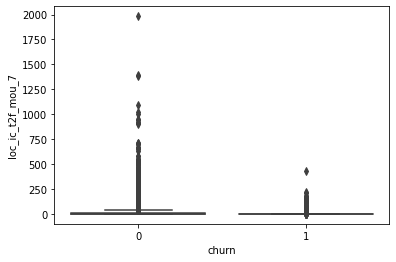

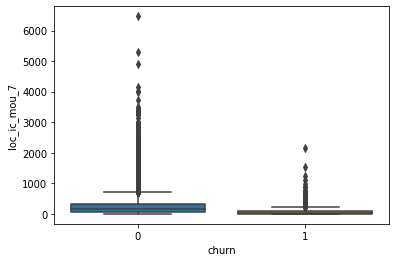

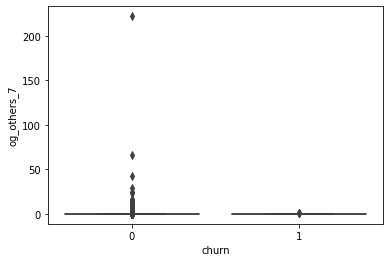

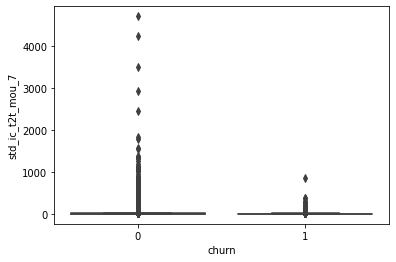

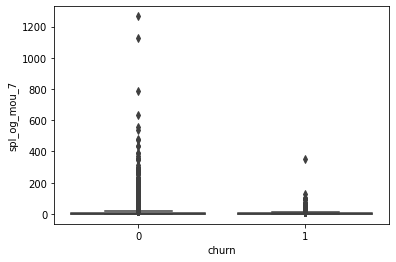

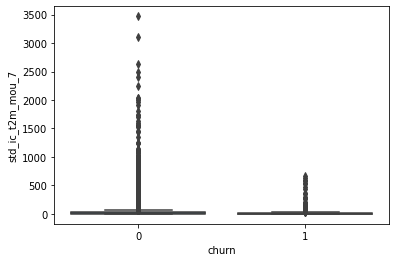

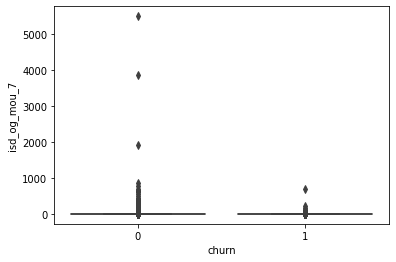

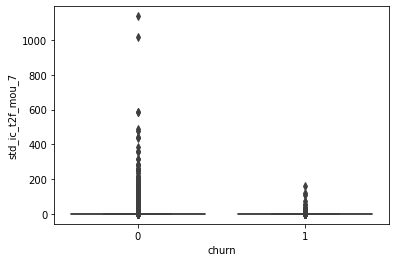

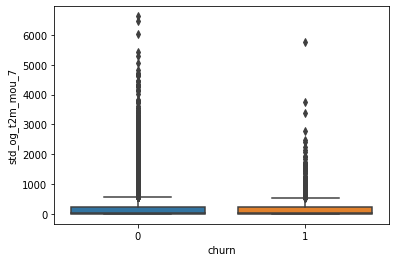

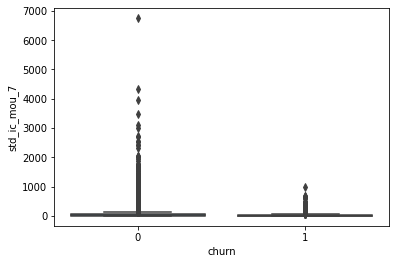

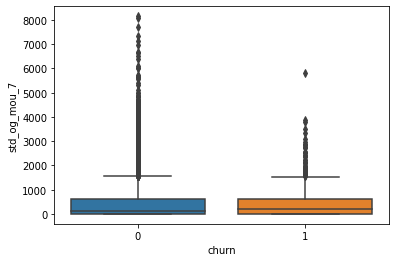

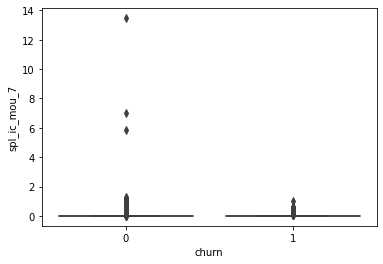

TypeError: Vertical orientation requires numeric `y` variable.

<Figure size 432x288 with 0 Axes>

In [27]:
for _column in filtered_columns:
    plt.figure()
    sns.boxplot(y=_column, x='churn', data=filtered_data, orient='v')
    plt.show()

In [28]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Data columns (total 90 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loc_ic_mou_6         20729 non-null  float64       
 1   spl_ic_mou_6         20729 non-null  float64       
 2   std_ic_t2t_mou_6     20729 non-null  float64       
 3   std_ic_t2f_mou_6     20729 non-null  float64       
 4   ic_others_6          20729 non-null  float64       
 5   isd_ic_mou_6         20729 non-null  float64       
 6   std_ic_mou_6         20729 non-null  float64       
 7   std_ic_t2m_mou_6     20729 non-null  float64       
 8   loc_ic_t2f_mou_6     20729 non-null  float64       
 9   loc_og_t2t_mou_6     20729 non-null  float64       
 10  std_og_t2m_mou_6     20729 non-null  float64       
 11  std_og_t2f_mou_6     20729 non-null  float64       
 12  loc_ic_t2m_mou_6     20729 non-null  float64       
 13  loc_og_mou_6         20729 non

#### Feature engineering: 

In [29]:
filtered_data.date_of_last_rech_7.dtype

dtype('<M8[ns]')

In [30]:
def filter_date_and_day(_data):
    for _column in _data.select_dtypes(include=['datetime64']).columns:
        _data[_column + '_year'] = _data[_column].dt.year 
        _data[_column + '_month'] = _data[_column].dt.month 
        _data[_column + '_day'] = _data[_column].dt.day
        _data.drop(columns=[_column], axis=1, inplace=True)
    return _data

filtered_data = filter_date_and_day(filtered_data)
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loc_ic_mou_6               20729 non-null  float64
 1   spl_ic_mou_6               20729 non-null  float64
 2   std_ic_t2t_mou_6           20729 non-null  float64
 3   std_ic_t2f_mou_6           20729 non-null  float64
 4   ic_others_6                20729 non-null  float64
 5   isd_ic_mou_6               20729 non-null  float64
 6   std_ic_mou_6               20729 non-null  float64
 7   std_ic_t2m_mou_6           20729 non-null  float64
 8   loc_ic_t2f_mou_6           20729 non-null  float64
 9   loc_og_t2t_mou_6           20729 non-null  float64
 10  std_og_t2m_mou_6           20729 non-null  float64
 11  std_og_t2f_mou_6           20729 non-null  float64
 12  loc_ic_t2m_mou_6           20729 non-null  float64
 13  loc_og_mou_6               20729 non-null  fl

In [31]:
filtered_data.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [32]:
# remove rows whose rows has null values more than 80
filtered_data = filtered_data[~(filtered_data.apply(lambda x: sum(x.isnull().values), axis = 1)> 80)]

In [33]:
filtered_data.shape

(20951, 94)

#### Standardise the data: 

In [34]:
filtered_data.dropna(inplace=True)

In [35]:
filtered_data.shape

(20535, 94)

In [36]:
qar = filtered_data['loc_og_t2m_mou_6'].quantile(1.0)
filtered_data[ filtered_data['onnet_mou_7'] < qar].shape

(20515, 94)

In [37]:
filtered_data.shape

(20535, 94)

In [38]:
def quantile_percentage(data):  
    quantile = pd.DataFrame(columns=['col', '10','50','85','90','95','99','100','max'])
    for col in data.columns:
        _tmp = data[col].quantile([0.1,0.5,0.85,0.9,0.95,0.99,1.0])
        quantile = quantile.append({'col': col, 
                                    '10': str(round(_tmp[0.1],2)), 
                                    '50': str(round(_tmp[0.5],2)),
                                    '85': str(round(_tmp[0.85],2)),
                                    '90': str(round(_tmp[0.9],2)),
                                    '95': str(round(_tmp[0.95],2)),
                                    '99': str(round(_tmp[0.99],2)),
                                    '100': str(round(_tmp[1.0],2)),
                                   'max':max(data[col])}, ignore_index=True)
    return quantile

pd.set_option('display.max_rows', 500)
quantile_percentage(filtered_data.select_dtypes([np.number]))

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\2472327156.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quantile = quantile.append({'col': col,
C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\2472327156.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quantile = quantile.append({'col': col,
C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\2472327156.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quantile = quantile.append({'col': col,
C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\2472327156.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quantile = quantile.append({'col': col,
C:\Users\kanik\AppData\Local\Tem

,col,10,50,85,90,95,99,100,max
0,loc_ic_mou_6,19.37,153.74,449.74,560.49,774.31,1458.75,4648.29,4648.290
1,spl_ic_mou_6,0.0,0.0,0.18,0.29,0.44,0.68,19.76,19.760
2,std_ic_t2t_mou_6,0.0,1.16,21.96,34.36,65.05,213.2,3038.34,3038.340
3,std_ic_t2f_mou_6,0.0,0.0,1.95,4.43,12.46,53.1,1351.11,1351.110
4,ic_others_6,0.0,0.0,0.5,1.21,3.73,20.6,1344.14,1344.140
5,isd_ic_mou_6,0.0,0.0,4.61,14.83,44.42,233.46,2138.98,2138.980
6,std_ic_mou_6,0.0,15.48,81.01,116.02,200.65,574.61,3929.24,3929.240
7,std_ic_t2m_mou_6,0.0,7.33,50.81,73.83,125.81,395.27,3613.98,3613.980
8,loc_ic_t2f_mou_6,0.0,2.09,26.06,39.92,74.85,195.62,1373.09,1373.090
9,loc_og_t2t_mou_6,1.24,33.23,151.23,207.71,345.84,1075.66,6431.33,6431.330


In [39]:
Q1 = filtered_data.quantile(0.05)
Q3 = filtered_data.quantile(0.99)
IQR = Q3 - Q1

filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data.shape

(19259, 94)

In [40]:
X = filtered_data.drop(columns=['churn'], axis=1)
Y = filtered_data[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()


,loc_ic_mou_6,spl_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2f_mou_6,ic_others_6,isd_ic_mou_6,std_ic_mou_6,std_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_og_t2t_mou_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,good_phase_recharge,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
12,-0.778662,-0.441684,-0.364995,-0.248823,-0.223411,-0.213952,-0.426495,-0.314240,-0.413042,-0.473743,...,-0.312808,-0.301522,-0.352604,-0.607290,0.0,0.0,0.562119,0.0,0.0,0.507354
15,-0.006156,-0.441684,-0.371864,-0.248823,-0.223411,-0.213952,-0.518842,-0.425455,-0.413042,-0.417869,...,0.795536,-0.301522,-0.352604,-0.431877,0.0,0.0,-0.603982,0.0,0.0,0.022109
23,0.586380,0.406931,-0.371864,-0.248823,-0.223411,-0.213952,2.010077,2.715715,0.579233,4.130786,...,-0.312808,-0.301522,-0.352604,1.636472,0.0,0.0,0.795340,0.0,0.0,0.749976
24,-0.043873,-0.441684,-0.371864,-0.248823,-0.223411,-0.213952,-0.433824,-0.319854,-0.413042,0.025425,...,-0.312637,-0.301522,-0.352604,-0.717114,0.0,0.0,-0.603982,0.0,0.0,-0.705758
25,0.509036,-0.441684,-0.371864,-0.153247,-0.223411,-0.095307,-0.193428,-0.032790,0.359434,-0.206909,...,-0.312808,-0.301522,-0.352604,-0.804058,0.0,0.0,0.328899,0.0,0.0,-1.191002


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [42]:
x_train.head()

,loc_ic_mou_6,spl_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2f_mou_6,ic_others_6,isd_ic_mou_6,std_ic_mou_6,std_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_og_t2t_mou_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,good_phase_recharge,date_of_last_rech_7_year,date_of_last_rech_7_month,date_of_last_rech_7_day,date_of_last_rech_6_year,date_of_last_rech_6_month,date_of_last_rech_6_day
7728,-0.473367,-0.441684,-0.252103,-0.248823,-0.223411,-0.213952,-0.394369,-0.331689,-0.413042,-0.288175,...,-0.312808,-0.301522,-0.352604,-0.392218,0.0,0.0,0.795340,0.0,0.0,0.749976
67397,0.389105,0.602766,-0.257479,0.095754,-0.197243,-0.213656,-0.356624,-0.323951,0.274985,-0.401476,...,-0.229263,-0.273821,1.787993,1.663928,0.0,0.0,0.795340,0.0,0.0,0.264732
12396,0.416747,1.255547,-0.349465,-0.248823,0.885453,-0.213656,-0.336713,-0.210612,-0.220429,-0.294872,...,-0.031189,0.648148,1.235259,1.174297,0.0,0.0,0.328899,0.0,0.0,0.264732
29212,-0.525280,-0.441684,-0.335727,-0.248823,-0.223411,-0.213952,-0.314970,-0.190584,-0.393954,-0.448511,...,0.698032,-0.301522,3.705393,-0.762874,0.0,0.0,-2.936186,0.0,0.0,0.264732
30636,0.149020,-0.441684,-0.371864,-0.248823,-0.223411,-0.213952,-0.459232,-0.351413,0.626952,-0.293961,...,2.292962,3.027720,-0.352604,-0.822362,0.0,0.0,-0.370762,0.0,0.0,0.022109


### Modeling & Tuning:

In [43]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-1.78719298e+00,  6.98046287e-01, -1.00809056e+00, ...,
         4.76567365e-16, -2.85710739e-16,  2.13587578e-16],
       [ 5.98348526e+00, -8.65055857e-01,  2.10909529e+00, ...,
        -5.99172167e-16, -4.96858224e-17,  2.35552091e-16],
       [ 1.50346696e+00, -1.54011230e+00,  4.26552937e+00, ...,
        -1.63828285e-16, -3.79913946e-16,  1.17073015e-16],
       ...,
       [-2.99156623e-01, -1.93304387e+00,  1.78180371e+00, ...,
        -8.00133561e-18,  1.00792800e-17,  4.32550909e-18],
       [ 7.60345177e+00,  1.69416486e+00, -2.80135570e+00, ...,
        -3.33485995e-17,  1.50070249e-17,  6.15720851e-18],
       [-3.04299576e-01, -2.72180715e+00,  5.89273923e+00, ...,
        -9.21126370e-18, -2.02785497e-18,  1.89552370e-17]])

In [44]:
pca.components_.round(4)

array([[ 0.2492,  0.002 ,  0.0277, ..., -0.    , -0.    , -0.0069],
       [-0.0678,  0.0115,  0.0533, ...,  0.    ,  0.    ,  0.1061],
       [-0.1351, -0.035 ,  0.0341, ...,  0.    ,  0.    , -0.0737],
       ...,
       [-0.    , -0.    , -0.    , ..., -0.    , -0.    , -0.    ],
       [ 0.    ,  0.    , -0.    , ...,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  1.    ,  0.    ]])

In [45]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.249227,-0.067800,loc_ic_mou_6
1,0.002009,0.011461,spl_ic_mou_6
2,0.027748,0.053309,std_ic_t2t_mou_6
3,0.066912,-0.033134,std_ic_t2f_mou_6
4,0.032932,0.003884,ic_others_6
5,0.035534,-0.018123,isd_ic_mou_6
6,0.062225,0.048978,std_ic_mou_6
7,0.055117,0.037746,std_ic_t2m_mou_6
8,0.125549,-0.061474,loc_ic_t2f_mou_6
9,0.142656,0.011414,loc_og_t2t_mou_6


In [46]:
pca.explained_variance_ratio_.round(4)

array([0.1106, 0.1001, 0.0626, 0.0466, 0.0414, 0.0394, 0.0311, 0.0286,
       0.0272, 0.0251, 0.0244, 0.0234, 0.0222, 0.0202, 0.0189, 0.0177,
       0.0165, 0.0149, 0.0147, 0.0132, 0.0131, 0.0128, 0.0119, 0.0118,
       0.0114, 0.0112, 0.0109, 0.0107, 0.0101, 0.0096, 0.0092, 0.009 ,
       0.0087, 0.0085, 0.0081, 0.0079, 0.0077, 0.0073, 0.0071, 0.0069,
       0.0066, 0.0062, 0.0061, 0.0057, 0.0056, 0.0054, 0.0052, 0.0052,
       0.0048, 0.0041, 0.004 , 0.0039, 0.0037, 0.0035, 0.0035, 0.0034,
       0.0032, 0.003 , 0.0029, 0.0027, 0.0026, 0.0024, 0.0024, 0.0021,
       0.0021, 0.0018, 0.0016, 0.0011, 0.001 , 0.0006, 0.0006, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    ])

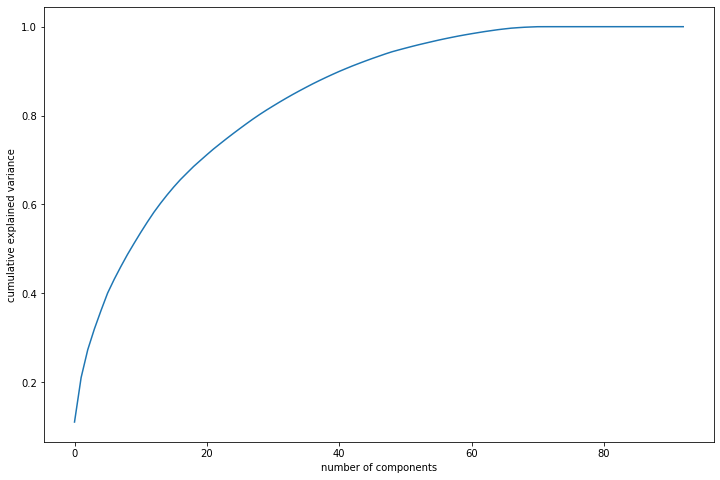

In [47]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### we try to make 85 components to describe 95% of the components

In [48]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(13481, 85)

#### Check correlation: 

<AxesSubplot:>

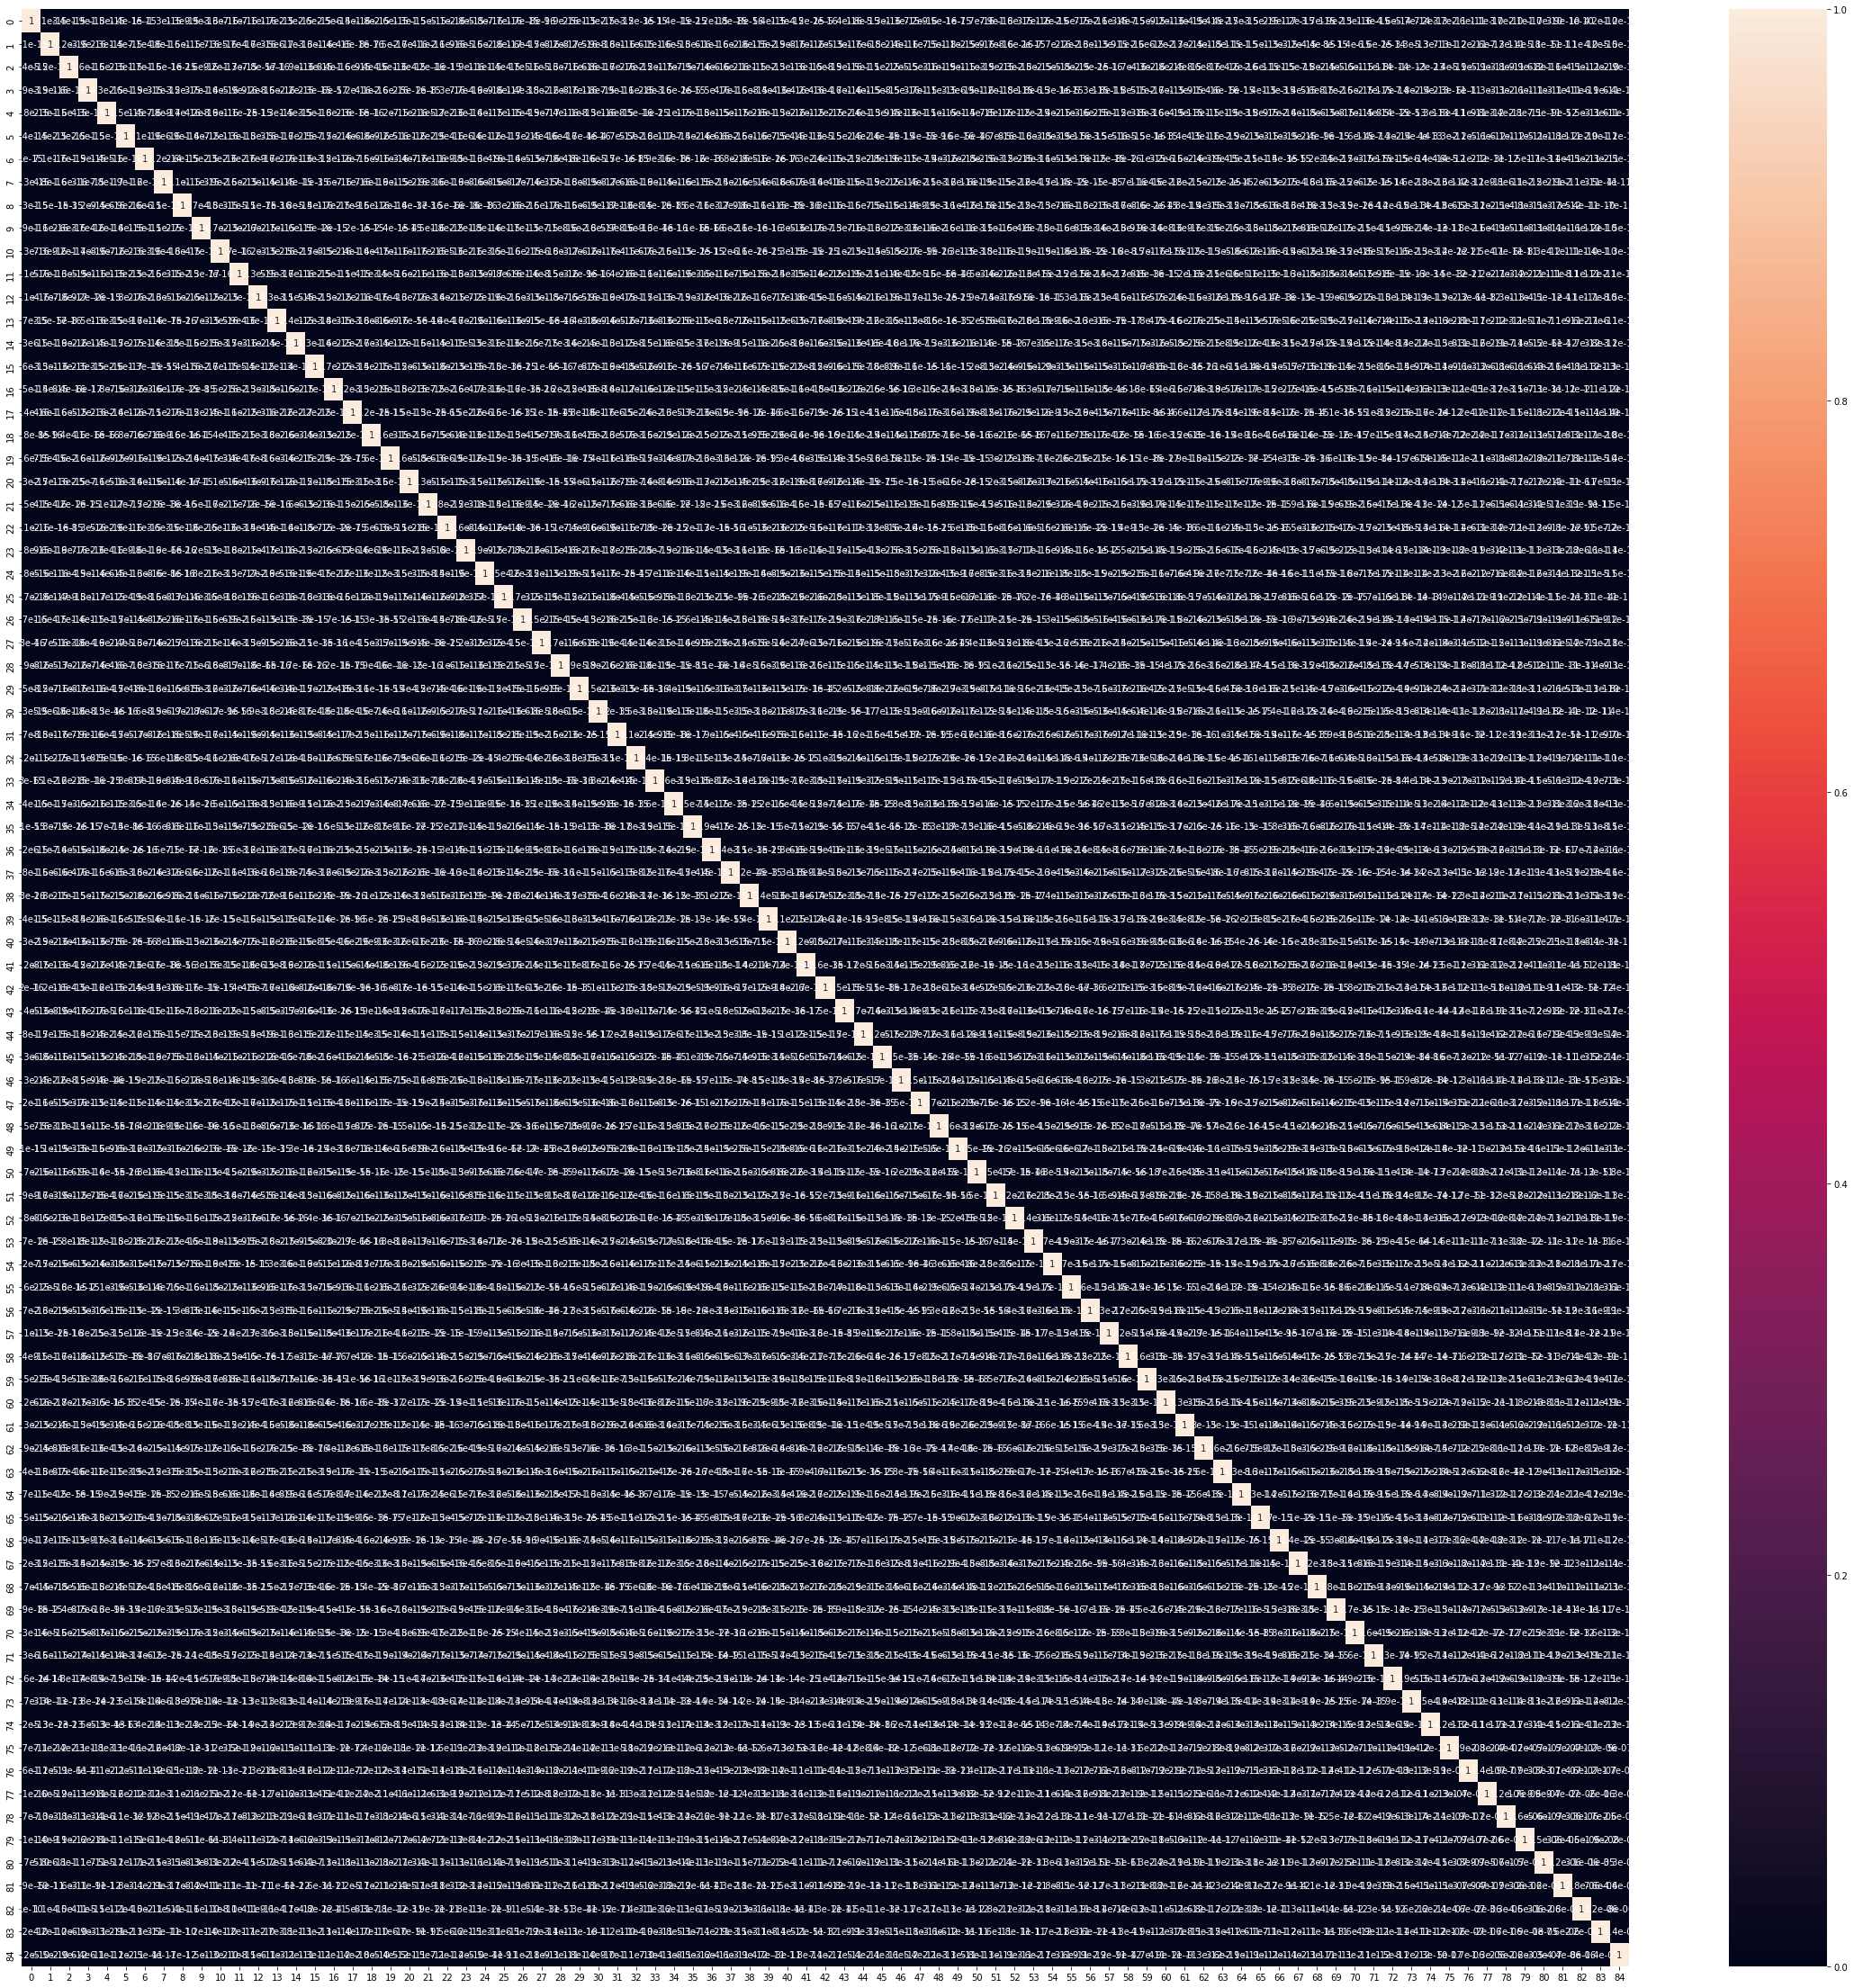

In [49]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

#### There is no co-relation b/w the variables:

#### Transform the test data:

In [50]:
pca_test_data = pca_final.transform(x_test)

In [51]:
pca_test_data.shape

(5778, 85)

### Logistic regression with PCA:

In [52]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)

C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]

In [54]:
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.94'

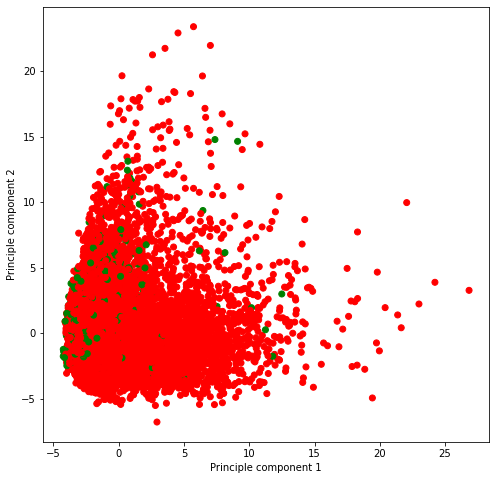

In [55]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train['churn'].map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\1291658900.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


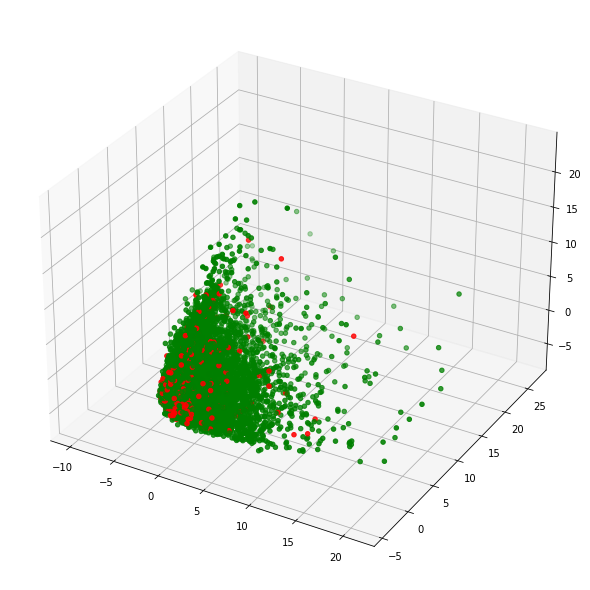

In [56]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train['churn'].map({0:'green',1:'red'}))

In [57]:
len(logistic_model.coef_[0])

85

In [58]:
len(colnames)

93

In [59]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

,PC1,PC2,Feature
0,0.249227,-0.067800,loc_ic_mou_6
1,0.002009,0.011461,spl_ic_mou_6
2,0.027748,0.053309,std_ic_t2t_mou_6
3,0.066912,-0.033134,std_ic_t2f_mou_6
4,0.032932,0.003884,ic_others_6


In [60]:
# result =  pd.DataFrame({'columns': colnames})
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\2343650801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_column_frame['coeff'] = logistic_model.coef_[0]


,PC1,PC2,Feature,coeff
51,0.058872,0.053159,std_ic_mou_7,-1.108669
22,-0.010133,0.029953,roam_og_mou_6,-0.724611
62,-0.017778,-0.006805,sachet_2g_7,-0.546626
0,0.249227,-0.067800,loc_ic_mou_6,-0.455372
61,0.059923,-0.052146,monthly_3g_6,-0.438476
35,-0.007041,0.006328,roam_ic_mou_7,-0.433948
27,-0.015665,0.029478,roam_og_mou_7,-0.350616
2,0.027748,0.053309,std_ic_t2t_mou_6,-0.350340
70,0.155662,0.182066,arpu_7,-0.335432
52,-0.051812,0.288194,std_og_mou_7,-0.328062


## Random forest classifier with PCA:

In [61]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\1811365117.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(df_train_pca,y_train)


RandomForestClassifier(max_depth=4, max_features=8, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=60, n_jobs=-1)

In [62]:
predictions = rfc.predict(pca_test_data)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5465
           1       0.00      0.00      0.00       313

    accuracy                           0.95      5778
   macro avg       0.47      0.50      0.49      5778
weighted avg       0.89      0.95      0.92      5778



C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [64]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.95

In [65]:
print(confusion_matrix(y_test, predictions))

[[5465    0]
 [ 313    0]]


In [66]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [67]:
predicted_proba[:10].round(3)

array([0.794, 0.008, 0.008, 0.011, 0.886, 0.   , 0.   , 0.435, 0.028,
       0.004])

In [68]:
print(confusion_matrix(y_test, predictions))

[[5465    0]
 [ 313    0]]


In [69]:
metrics.roc_auc_score(y_test, predicted_proba)

0.9397782578067223

#### Observation:

**Though there is a accurasy of 94% it's not able to identify the churned users.**
**it's because of class imbalance**
**We will try to reduce the class imbalance using imblearn different techniques**

### Sampling :

In [70]:
# !pip install imblearn
# !pip install imbalanced-learn
import imblearn


In [71]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0) #return_indices=True
x_rus, y_run = rus.fit_resample(x_train, y_train)

In [72]:
x_rus.shape

(1372, 93)

In [73]:
y_run.sum()

churn    686
dtype: int64

Note: There may be a chance of loosing the data with under sampling

### Over sampling: 

In [74]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0) #return_indices=True

# x_ros, y_ros, ind = ros.fit_sample(x_train, y_train)
# x_test_ros, y_test_ros, ind = ros.fit_sample(x_test, y_test)

x_ros, y_ros = ros.fit_resample(df_train_pca, y_train) #, ind
x_test_ros, y_test_ros = ros.fit_resample(pca_test_data, y_test)

In [75]:
x_ros.shape

(25590, 85)

In [76]:
y_ros.sum()

churn    12795
dtype: int64

In [77]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [78]:
rfe_algo = fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\1764891417.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_data, y_train_data)


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      5465
           1       0.90      0.78      0.84      5465

    accuracy                           0.85     10930
   macro avg       0.85      0.85      0.85     10930
weighted avg       0.85      0.85      0.85     10930

0.846843549862763
[[5001  464]
 [1210 4255]]


**Observation: There is a overfit in the data set from the result we can see**

### Oversampling followed by under sampling:

In [79]:
from imblearn.over_sampling import SMOTE
smt = SMOTE() 
x_smt_train, y_smt_train = smt.fit_resample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_resample(pca_test_data, y_test)

In [80]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\1764891417.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_data, y_train_data)


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5465
           1       0.92      0.81      0.87      5465

    accuracy                           0.87     10930
   macro avg       0.88      0.87      0.87     10930
weighted avg       0.88      0.87      0.87     10930

0.8731930466605673
[[5092  373]
 [1013 4452]]


In [81]:
rfe_algo.feature_importances_.round(3)

array([0.079, 0.027, 0.009, 0.008, 0.003, 0.001, 0.004, 0.166, 0.002,
       0.038, 0.014, 0.004, 0.001, 0.003, 0.009, 0.003, 0.001, 0.004,
       0.001, 0.004, 0.004, 0.009, 0.053, 0.139, 0.   , 0.119, 0.12 ,
       0.068, 0.002, 0.01 , 0.011, 0.005, 0.018, 0.003, 0.002, 0.001,
       0.003, 0.019, 0.009, 0.   , 0.001, 0.001, 0.003, 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.001, 0.001, 0.   , 0.001, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.001,
       0.007, 0.   , 0.   , 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

### Over sampling with under sampling with logistic regression: 

In [82]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return log

In [83]:
log_alg = fit_logistic_regression(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95.7


C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [85]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

,ChurnProbability,y_train
0,0.026467,0
1,0.000274,0
2,0.165564,0
3,0.000353,0
4,0.011847,0
5,0.026989,0
6,0.019069,0
7,0.034029,0
8,0.812329,0
9,0.279576,0


In [86]:
log_alg.classes_

array([0, 1], dtype=int64)

In [87]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    print(cm)
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

[[    0 12795]
 [    0 12795]]
[[ 8344  4451]
 [  117 12678]]
[[10115  2680]
 [  339 12456]]
[[11028  1767]
 [  655 12140]]
[[11519  1276]
 [  995 11800]]
[[11760  1035]
 [ 1314 11481]]
[[11975   820]
 [ 1707 11088]]
[[12128   667]
 [ 2196 10599]]
[[12278   517]
 [ 2921  9874]]
[[12463   332]
 [ 3934  8861]]


,prob,accuracy,sensitivity,specificity
0.0,0.0,0.500,1.000,0.000
0.1,0.1,0.821,0.991,0.652
0.2,0.2,0.882,0.974,0.791
0.3,0.3,0.905,0.949,0.862
0.4,0.4,0.911,0.922,0.900
0.5,0.5,0.908,0.897,0.919
0.6,0.6,0.901,0.867,0.936
0.7,0.7,0.888,0.828,0.948
0.8,0.8,0.866,0.772,0.960
0.9,0.9,0.833,0.693,0.974


<AxesSubplot:xlabel='prob'>

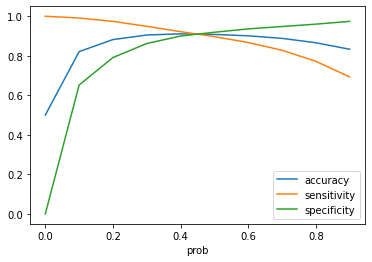

In [88]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

In [89]:
_percentage

array([2.64670854e-02, 2.73662817e-04, 1.65564385e-01, ...,
       6.90477865e-01, 9.68852968e-01, 9.91296972e-01])

In [90]:
_test_percentage = log_alg.predict_proba(x_smt_test)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': log_alg.predict_proba(x_smt_test)[:,1]})
test_churn_predicted['y_test'] = y_smt_test
test_churn_predicted['0.55_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted['0.65_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.65 else 0)
test_churn_predicted['0.60_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.6 else 0)
test_churn_predicted.head(10)

,ChurnProbability,y_test,0.55_predict,0.65_predict,0.60_predict
0,0.993925,1,1,1,1
1,0.021616,0,0,0,0
2,0.046353,0,0,0,0
3,0.130448,0,0,0,0
4,0.991924,1,1,1,1
5,0.000891,0,0,0,0
6,0.000002,0,0,0,0
7,0.977212,1,1,1,1
8,0.307380,0,0,0,0
9,0.017447,0,0,0,0


In [91]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.65_predict'])
cm

array([[5132,  333],
       [1059, 4406]], dtype=int64)

In [92]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.60_predict'])
cm

array([[5095,  370],
       [ 953, 4512]], dtype=int64)

In [93]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.55_predict'])
cm

array([[5057,  408],
       [ 860, 4605]], dtype=int64)

##### **Has an accuracy of 91.5**

In [94]:
_percentage = log_alg.predict_proba(x_smt_test)[:,1]

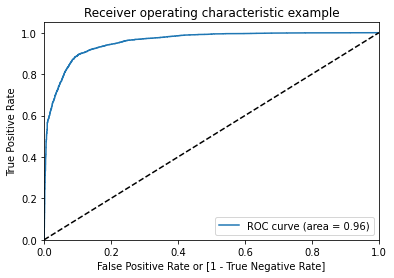

In [95]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_smt_test, _percentage)


In [96]:
log_alg.coef_.round(2)

array([[-0.63,  0.27, -0.48,  0.23, -0.36,  0.08,  0.17,  0.93,  0.13,
        -0.24, -0.03, -0.01, -0.07, -0.04,  0.33, -0.11,  0.1 , -0.22,
         0.08,  0.  ,  0.34,  0.11, -0.79,  0.38, -0.01, -0.34,  0.78,
        -0.46, -0.08,  0.5 ,  0.17, -0.26, -0.17, -0.21,  0.04, -0.43,
        -0.23,  0.09, -0.11,  0.01, -0.12,  0.02, -0.01, -0.14, -0.14,
         0.16, -0.31, -0.16, -0.22, -0.25, -0.06, -1.38, -0.42,  0.  ,
        -0.2 , -0.25,  0.15,  0.44, -0.17, -0.01, -0.03, -0.23, -0.47,
        -0.02,  0.14, -0.08, -0.14,  0.43,  0.09, -0.2 , -0.65,  1.06,
        -1.13, -0.1 , -0.28,  0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
         0.  , -0.  ,  0.  , -0.  ]])

In [97]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\3453176900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_column_frame['sampling_coeff'] = log_alg.coef_[0]


,PC1,PC2,Feature,coeff,sampling_coeff
51,0.058872,0.053159,std_ic_mou_7,-1.108669,-1.376920
72,0.072618,0.282635,total_og_mou_7,-0.137216,-1.125467
71,0.086411,0.271329,total_og_mou_6,1.019346,1.059892
7,0.055117,0.037746,std_ic_t2m_mou_6,0.765669,0.927098
22,-0.010133,0.029953,roam_og_mou_6,-0.724611,-0.786988
26,0.160249,-0.033335,loc_ic_t2t_mou_6,0.621936,0.784374
70,0.155662,0.182066,arpu_7,-0.335432,-0.647328
0,0.249227,-0.067800,loc_ic_mou_6,-0.455372,-0.626603
29,0.235544,0.003143,loc_og_mou_7,0.438724,0.500849
2,0.027748,0.053309,std_ic_t2t_mou_6,-0.350340,-0.475270


### Random Forest:

In [98]:
# x_smt_train, x_smt_test, y_smt_train, y_smt_test

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\2098922269.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_smt_train, y_smt_train)


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5465
           1       0.92      0.85      0.88      5465

    accuracy                           0.89     10930
   macro avg       0.89      0.89      0.88     10930
weighted avg       0.89      0.89      0.88     10930

[[5040  425]
 [ 831 4634]]


In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [100]:
r_model = RandomForestClassifier()
params = {
    'max_features': range(30, 40, 5),
    'n_estimators': [40],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(100, 150, 25),
    'max_depth': [7, 8, 9]
}

folds = KFold(n_splits=2, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_smt_train, y_smt_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\kanik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'max_features': range(30, 40, 5),
                         'min_samples_leaf': range(100, 150, 25),
                         'min_samples_split': range(100, 150, 25),
                         'n_estimators': [40]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [101]:
results = pd.DataFrame(grid_cv1.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,8.831195,0.735435,0.070860,0.001798,7,30,100,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.910434,0.900899,0.905666,0.004767,7,0.911997,0.911841,0.911919,0.000078
1,8.783305,0.913522,0.078769,0.008243,7,30,100,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.910356,0.901055,0.905705,0.004650,6,0.911919,0.913716,0.912818,0.000899
2,8.966989,0.442069,0.076028,0.001508,7,30,125,100,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.903243,0.898789,0.901016,0.002227,23,0.903556,0.909887,0.906721,0.003165
3,8.935600,0.601749,0.071194,0.007389,7,30,125,125,40,"{'max_depth': 7, 'max_features': 30, 'min_samp...",0.907776,0.898007,0.902892,0.004885,16,0.907464,0.909730,0.908597,0.001133
4,9.826282,0.592001,0.068521,0.003997,7,35,100,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.910512,0.897538,0.904025,0.006487,11,0.908089,0.909652,0.908871,0.000782
5,10.020250,0.612470,0.070322,0.001516,7,35,100,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.909496,0.900430,0.904963,0.004533,10,0.909340,0.911059,0.910199,0.000860
6,10.032278,0.064393,0.073021,0.002501,7,35,125,100,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.902071,0.897382,0.899726,0.002345,24,0.898007,0.907933,0.902970,0.004963
7,10.181926,0.257311,0.072258,0.000265,7,35,125,125,40,"{'max_depth': 7, 'max_features': 35, 'min_samp...",0.908636,0.895193,0.901915,0.006721,22,0.904025,0.908558,0.906292,0.002267
8,9.093647,0.641687,0.080270,0.003260,8,30,100,100,40,"{'max_depth': 8, 'max_features': 30, 'min_samp...",0.911137,0.900742,0.905940,0.005197,4,0.911684,0.913794,0.912739,0.001055
9,9.141875,0.817002,0.078913,0.002616,8,30,100,125,40,"{'max_depth': 8, 'max_features': 30, 'min_samp...",0.913091,0.901915,0.907503,0.005588,2,0.912153,0.914263,0.913208,0.001055


In [102]:
grid_cv1.best_params_

{'max_depth': 9,
 'max_features': 30,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 40}

In [103]:
best_estimator = grid_cv1.best_estimator_

In [104]:
best_estimator.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = best_estimator.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


C:\Users\kanik\AppData\Local\Temp\ipykernel_14040\1470646124.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(x_smt_train, y_smt_train)


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5465
           1       0.92      0.85      0.88      5465

    accuracy                           0.89     10930
   macro avg       0.89      0.89      0.89     10930
weighted avg       0.89      0.89      0.89     10930

[[5045  420]
 [ 828 4637]]


In [105]:
best_estimator.feature_importances_.round(3)

array([0.08 , 0.011, 0.004, 0.005, 0.001, 0.006, 0.002, 0.344, 0.001,
       0.01 , 0.005, 0.002, 0.002, 0.003, 0.001, 0.001, 0.001, 0.001,
       0.   , 0.002, 0.004, 0.004, 0.029, 0.19 , 0.001, 0.048, 0.094,
       0.064, 0.001, 0.011, 0.001, 0.001, 0.007, 0.001, 0.002, 0.001,
       0.   , 0.008, 0.007, 0.   , 0.   , 0.001, 0.004, 0.001, 0.   ,
       0.   , 0.001, 0.003, 0.   , 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.001, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.002,
       0.015, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.001,
       0.   , 0.   , 0.   , 0.   ])

### Observation: 

### **From the observation we can see that PCA with Logistic regression has balanced specificity and recall**

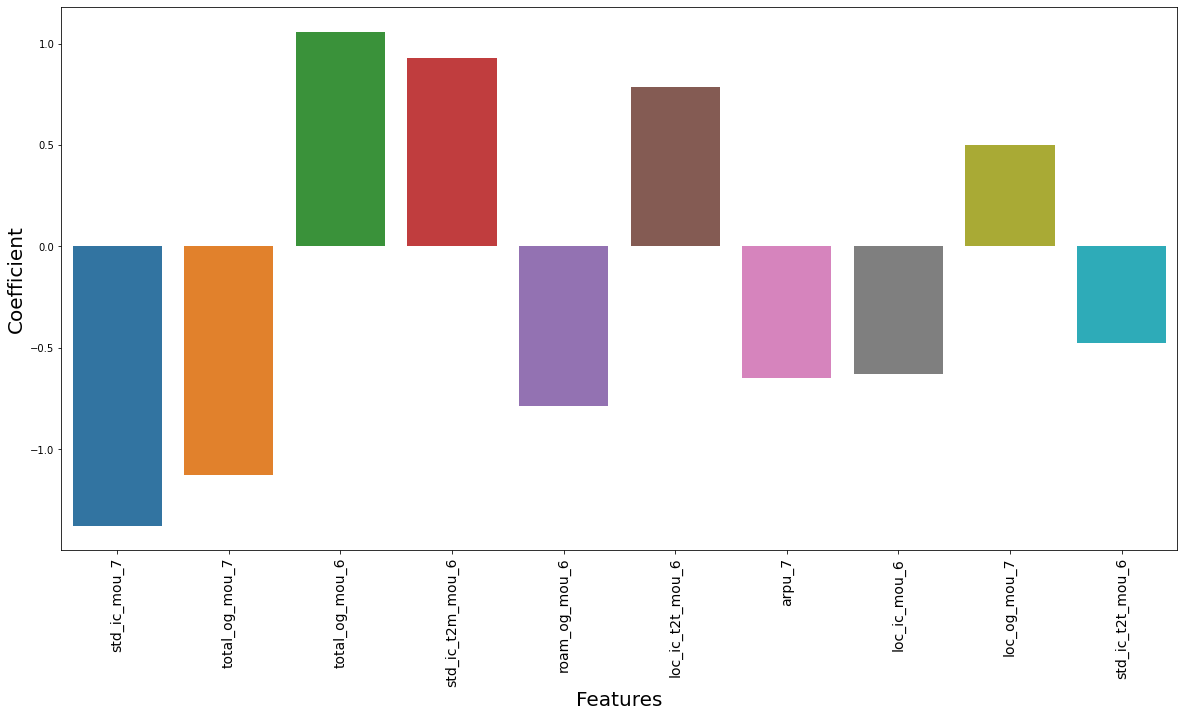

In [106]:
pca_column_frame

plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

#### From the below observations we can derive the top features that can impact the churn: 

* Outgoing others 
* Roaming outgoing minutes of usage
* STD incoming  minutes of usage
* STD incoming Operator T to other operator mobile
* Roaming Outgoing minutes of usage
* Average revenue per user
* local incoming Operator T to T (within same operator) minutes of usage
* Service schemes with validity smaller than a month
* Local outgoing minutes of usage